### Regression with `pytorch`

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt

In [2]:
a = np.random.normal(size = (30, 10))

In [3]:
# a.T

In [4]:
x = np.linspace(0, 10, 100)
y = 3*x + np.random.normal(size = len(x), scale = 3)

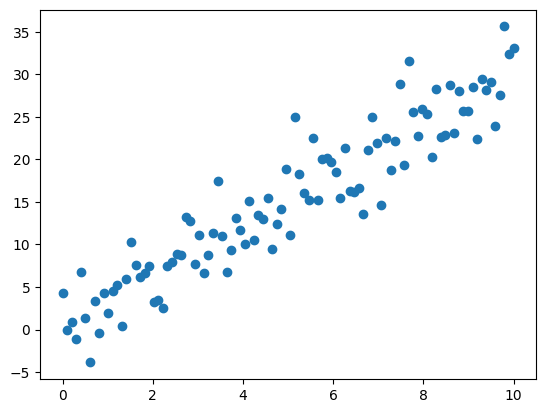

In [5]:
plt.scatter(x, y)

In [6]:
def mse_loss(slope):
  return np.mean((y - slope*x)**2)

In [7]:
def dmse(slope):
  return 2*np.mean((y - slope*x)*-x)

In [8]:
first_guess = 1

In [9]:
mse_loss(first_guess)

148.88690018285234

In [10]:
step_size = 0.1

In [11]:
second_guess = first_guess - step_size*dmse(first_guess)

In [12]:
second_guess - step_size*dmse(second_guess)

-63.049811374498134

In [13]:
beta_0 = 1
step_size = 0.01
betas = [beta_0]
for i in range(100):
  beta_next = betas[-1] - step_size * dmse(betas[-1])
  betas.append(beta_next)

In [14]:
betas[-1]

3.033725148497899

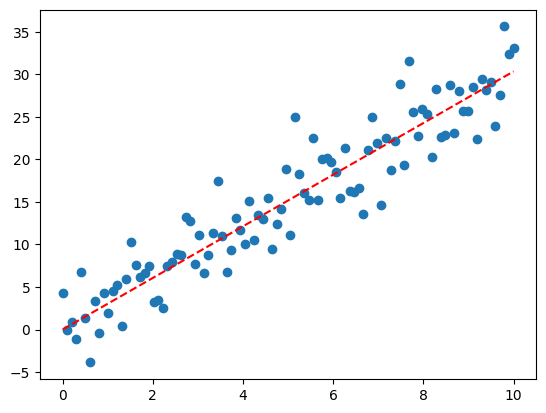

In [15]:
plt.scatter(x, y)
plt.plot(x, betas[-1]*x, '--r')

#### `pytorch`

In [16]:
layer_1 = nn.Linear(in_features = 1, out_features = 1)

In [17]:
layer_1

Linear(in_features=1, out_features=1, bias=True)

In [18]:
list(layer_1.parameters())

[Parameter containing:
 tensor([[-0.8604]], requires_grad=True),
 Parameter containing:
 tensor([0.5420], requires_grad=True)]

In [19]:
xt = torch.tensor(x, dtype = torch.float32)
yt = torch.tensor(y, dtype = torch.float32)

In [20]:
x.dtype

dtype('float64')

In [21]:
list(layer_1.parameters())

[Parameter containing:
 tensor([[-0.8604]], requires_grad=True),
 Parameter containing:
 tensor([0.5420], requires_grad=True)]

In [22]:
xt.shape

torch.Size([100])

In [23]:
xt.unsqueeze(1).shape

torch.Size([100, 1])

In [24]:
layer_1(xt.unsqueeze(1))

tensor([[ 0.5420],
        [ 0.4551],
        [ 0.3682],
        [ 0.2813],
        [ 0.1943],
        [ 0.1074],
        [ 0.0205],
        [-0.0664],
        [-0.1533],
        [-0.2402],
        [-0.3271],
        [-0.4140],
        [-0.5009],
        [-0.5878],
        [-0.6747],
        [-0.7616],
        [-0.8485],
        [-0.9354],
        [-1.0223],
        [-1.1093],
        [-1.1962],
        [-1.2831],
        [-1.3700],
        [-1.4569],
        [-1.5438],
        [-1.6307],
        [-1.7176],
        [-1.8045],
        [-1.8914],
        [-1.9783],
        [-2.0652],
        [-2.1521],
        [-2.2390],
        [-2.3259],
        [-2.4129],
        [-2.4998],
        [-2.5867],
        [-2.6736],
        [-2.7605],
        [-2.8474],
        [-2.9343],
        [-3.0212],
        [-3.1081],
        [-3.1950],
        [-3.2819],
        [-3.3688],
        [-3.4557],
        [-3.5426],
        [-3.6295],
        [-3.7165],
        [-3.8034],
        [-3.8903],
        [-3.

In [25]:
model = nn.Sequential(nn.Linear(in_features = 1, out_features = 1))

In [26]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.8947]], requires_grad=True),
 Parameter containing:
 tensor([-0.5989], requires_grad=True)]

In [27]:
plt.scatter(x, y)
plt.plot(x, , '--r')

SyntaxError: invalid syntax (2674650673.py, line 2)

In [ ]:
loss_fn = nn.MSELoss()

In [ ]:
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [ ]:
losses = []
for epoch in range(100):
  #make predictions
  yhat = model(xt.unsqueeze(1))
  #evaluate predictions
  loss = loss_fn(yt.unsqueeze(1), yhat)
  #gradient descent: clear out gradient, compute new grad, step down
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  losses.append(loss.item())


In [ ]:
plt.plot(losses)

In [ ]:
list(model.parameters())

In [ ]:
slope, intercept = list(model.parameters())

In [ ]:
slope.shape

In [ ]:
intercept.shape

In [ ]:
plt.scatter(x, y)
plt.plot(x, slope.detach().numpy()[0]*x + intercept.detach().numpy(), '-r')

# Regression Example


In [ ]:
from sklearn.datasets import load_diabetes

In [ ]:
diabetes = load_diabetes(as_frame=True)

In [ ]:
diabetes.frame.head()

In [ ]:
X = diabetes.data
y = diabetes.target

In [ ]:
#turn X,y into pytorch tensors


In [ ]:
#create a model with appropriate number of input features
model = ''

In [ ]:
#create the appropriate loss function
loss_function = ''

In [ ]:
#instantiate SGD optimizer with model's parameters
#set lr = 0.01
optimizer = ''

In [ ]:
#train for 100 epochs and keep track of loss
#did the network learn?


In [ ]:
#what is the MSE of the model?


### Binary Classification

- output with `nn.Sigmoid` activation
- loss function is `nn.BCELoss`

Example: [Tensorflow Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.67477&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
X, y = make_blobs( n_samples = 100, centers = 2, random_state = 42)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c = y)

In [ ]:
model = nn.Sequential(nn.Linear(in_features = 2, out_features = 100),
                      nn.ReLU(),
                      nn.Linear(in_features = 100, out_features = 50),
                      nn.ReLU(),
                      nn.Linear(in_features = 50, out_features = 1),
                     nn.Sigmoid())

**Loss Functions**

- Regression: `nn.MSELoss()`
- Binary Classification: `nn.BCELoss()`
- Multiclass Classification: `nn.CategoricalCrossEntropy()`

In [ ]:
loss_fn = nn.BCELoss()

In [ ]:
optimizer = optim.Adam(model.parameters(), lr = 0.01)

In [ ]:
Xt = torch.tensor(X, dtype = torch.float32)
yt = torch.tensor(y, dtype = torch.float32)

In [ ]:
yt.dtype

In [ ]:
model(Xt)

In [ ]:
Xt.shape

In [ ]:
losses = []
for epoch in range(100):
  #make predictions
  yhat = model(Xt)
  #evaluate predictions
  loss = loss_fn(yhat, yt.unsqueeze(1))
  #gradient descent: clear out gradient, compute new grad, step down
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  losses.append(loss.item())
  # if epoch > 3 and abs(losses[-1] - losses[-2]) < .001:
  #   break

In [ ]:
plt.plot(losses)

In [ ]:
list(model.parameters())

In [ ]:
preds = torch.where(model(Xt) > .5, 1, 0)

In [ ]:
torch.sum(preds.flatten() == yt.flatten())

In [ ]:
100/len(yt)

Binary Classification Example

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer = load_breast_cancer(as_frame = True)

In [ ]:
X = cancer.data
y = cancer.target

In [ ]:
#create tensors


In [ ]:
#model for binary classification
#use one linear layer with appropriate inputs and 1 output
#use sigmoid activation at the end


In [ ]:
#loss and optimization


In [ ]:
#train the model


In [ ]:
#did it learn?


### Multi-Class Classification

- Output Layer: Output is shape (n classes,)
- Loss Function: `nn.CrossEntropyLoss`

In [ ]:
from torchvision.datasets import FashionMNIST

In [ ]:
import torch.nn as nn
import torch.optim as optim
import torch
import matplotlib.pyplot as plt

In [ ]:
train = FashionMNIST('.', download=True)

In [ ]:
plt.imshow(train[0][0], cmap = 'gray')

In [ ]:
train[0][0].size

In [ ]:
from torchvision.transforms import Compose, ToTensor, Normalize

In [ ]:
transforms = Compose([ToTensor(), Normalize((0.5,), (0.5,))])

In [ ]:
train = FashionMNIST('.', download=True, transform = transforms)

In [ ]:
train[0][0].shape

In [ ]:
model = nn.Sequential(nn.Flatten(),
                      nn.Linear(28*28, 128),
                      nn.ReLU(),
                      nn.Linear(128, 256),
                      nn.ReLU(),
                      nn.Linear(256, 128),
                      nn.ReLU(),
                      nn.Linear(128, 10))

In [ ]:
optimizer = optim.SGD(model.parameters(), lr = 0.01)
loss_fn = nn.CrossEntropyLoss()

### Using the `DataLoader`

Rather than passing the entire dataset through the model each pass, it is more efficient to repeatedly pass smaller batches of randomly selected points.  PyTorch offers the `DataLoader` to create these batches and we can iterate over the loader to extract these random batches.

In [ ]:
from torch.utils.data import DataLoader
from tqdm import tqdm

In [ ]:
trainloader = DataLoader(train, batch_size = 32)

In [ ]:
losses = []
for i in tqdm(range(20)):
  for X, y in trainloader:
    yhat = model(X)
    loss = loss_fn(yhat, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  losses.append(loss.item())

In [ ]:
correct = 0
total = 0
for x, y in trainloader:
  yhat = model(x)
  correct += (torch.argmax(yhat, dim = 1) == y).sum()
  total += len(y)

In [ ]:
correct/total

### Multi-Class Exercise

Below, build a neural network to classify iris flowers.

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris(as_frame = True)

In [ ]:
X = iris.data
y = iris.target